In [1]:
# 23/24
# from package import * EST INTERDIT
# Sauf mention du contraire, il est inutile de rajouter d'autres packages
import pylab as plt
import numpy as np
import numpy.random as rd
from scipy.integrate import odeint
from scipy.linalg import eig
# taper ds le shell "cd le nom du répertoire" où se trouve le fichier edoenv
# OU 
# ouvrir File Browse ds Tools
# selectionner le répertoire où se trouve edoenv.py
# et ds l'étoile cliquer "Go to the directory in the current shell"
# OU
# ouvrir explorateur de fichiers ds Outils
# selectionner le répertoire où se trouve edoenv.py
# et ds l'étoile cliquer "Aller ds ce dossier (shell courant)"
from edoenv import envpp

plt.ion()  # interactive on
plt.show() # affiche les figures
plt.rcParams['figure.figsize'] = [10, 7]

In [2]:
a=0.5
c=1.5
e=1

In [3]:
#Question 1

f=lambda y,t: np.array([a*y[0]-y[0]*y[1]-e*y[0]*y[0],-c*y[1]+y[0]*y[1]])

In [4]:
#Question 2
ti=0
tf=25
h=0.02
T=np.arange(ti,tf+h,h)

Text(0.5, 1.0, 'Trajectoire partant de (1,1)')

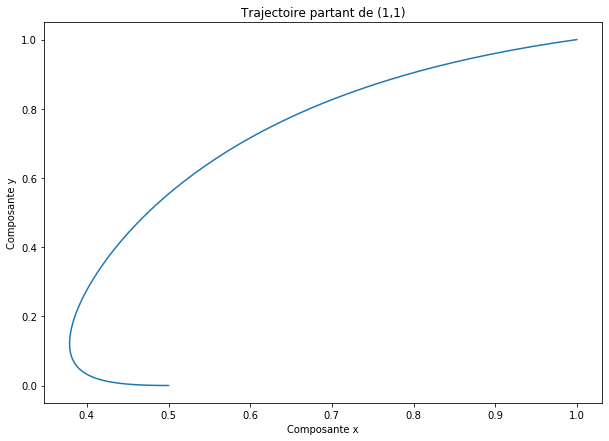

In [5]:
#Question 3

Y0=np.array([1.0,1.0])
Sode=odeint(f,Y0,T)
plt.plot(Sode[:,0],Sode[:,1])
plt.xlabel("Composante x")
plt.ylabel("Composante y")
plt.title("Trajectoire partant de (1,1)")

$\textbf{Remarque :}$ Dans les portraits de phase ci-dessous, les trajectoires sont en bleu tandis que les deux isoclines horizontales sont en vert et l'isocline verticale est en rouge. Les points critiques et droites dirigées par les vecteurs propres étudiés dans l'exercice 3 sont affichés en violet.

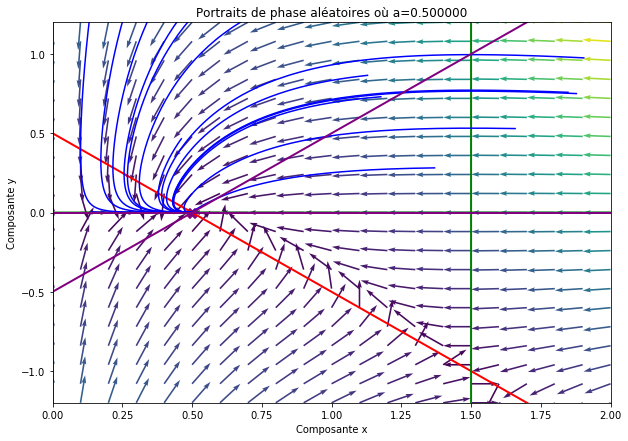

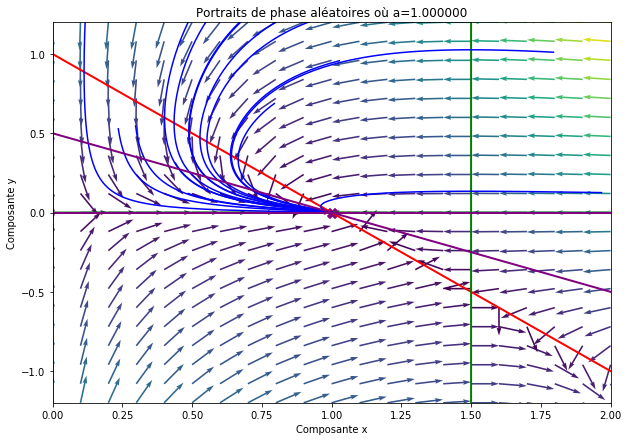

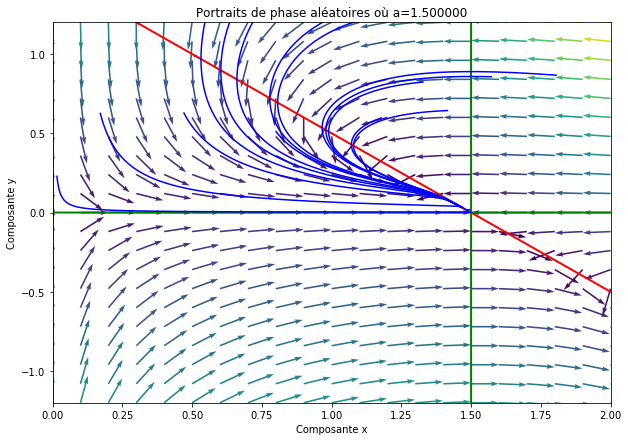

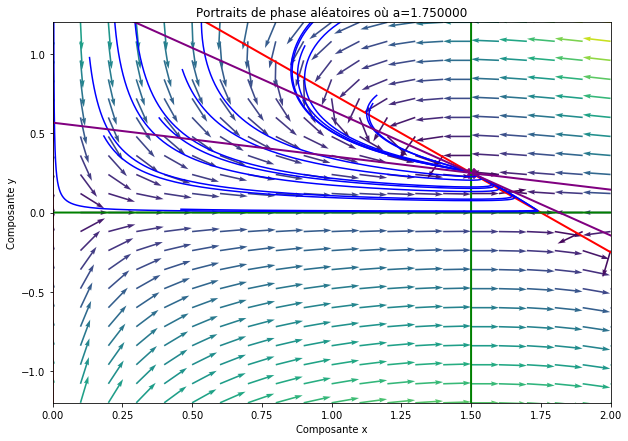

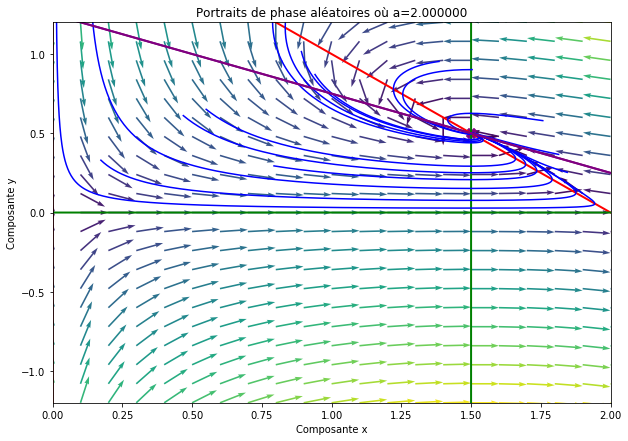

<Figure size 720x504 with 0 Axes>

In [6]:
#Questions 4 à 7

tab_a=[0.5,1,1.5,1.75,2]

xmin=0
xmax=2
ymin=-1.2
ymax=1.2

for a_new in tab_a :
    a=a_new
    CI=rd.rand(15,2)*2
    for y0 in CI :
            Sode=odeint(f,y0,T)
            plt.plot(Sode[:,0],Sode[:,1], color="blue")

    plt.axis([xmin,xmax,ymin,ymax]) # Question 5
    envpp(f,xmin,xmax,ymin,ymax) #Question 6
    
    #Exercice 3
    if a<c :
        plt.scatter(a,0,s=100,color="purple",marker="X")
        A= np.matrix([[-a,-a],[0,-c+a]])
        D,V=eig(A)
        plt.plot([10*V[0][0]+a,a-10*V[0][0]],[10*V[1][0],-10*V[1][0]], color="purple",linewidth=2)
        plt.plot([10*V[0][1]+a,a-10*V[0][1]],[10*V[1][1],-10*V[1][1]], color="purple",linewidth=2)
    if a>c :
            plt.scatter(c,a-c,s=100,color="purple",marker="X")
            A= np.matrix([[-c,-c],[a-c,0]])
            D,V=eig(A)
            plt.plot([c+10*V[0][0],c-10*V[0][0]],[a-c+10*V[1][0],a-c-10*V[1][0]], color="purple",linewidth=2)
            plt.plot([c+10*V[0][1],c-10*V[0][1]],[a-c+10*V[1][1],a-c-10*V[1][1]], color="purple",linewidth=2)
            
    plt.xlabel("Composante x")
    plt.ylabel("Composante y")
    plt.title("Portraits de phase aléatoires où a=%f"%a)
    plt.figure()

$\textbf{Question 8 :}$

Premièrement, on constate que l'isocline horizontale (ici en vert) reste inchagée. En effet, en étudiant l'équation différentielle, on constate qu'elle correspond à la droite $x=c$, et $c$ est constant. Ensuite, l'autre isocline qui est verticale (en rouge) est translatée verticalement à chaque fois que l'on incrémente $a$. En étudiant l'équation différentielle, on constate qu'elle correspond à la droite $y=a-ex$, ce qui justifie l'observation précédente.

Ensuite, on constate que le système est toujours stable, mais que le point critique se déplace. En effet, on sait que les points critiques se situent à l'intersection des isoclines, or ici il n'y a que deux droites (non parallèles), elles ont donc un unique point d'intersection. Avec les observations précédentes sur les équations de droite, on obtient que les coordonnées du point critique sont $(c,a-ec)$. Ainsi, le point critique est translatée verticalement à chaque incrémentation de $a$ le long de la droite $x=c$.

$\textbf{Commentaires de l'exercice 3:}$ On constate que les trajectoire sont tangentielles aux droites dirigées par les vecteurs propres au voisinage du point critique. Cette observation est formalisée par le théorème de Hartman-Grobman qui dit que le comportement du système linéarisé est le même que celui du système complet lorsque l'on se place au voisinage d'un point critique tels que toutes les valeurs propres du jacobien en ce point ont une partie réelle non nulle. En particulier dans le dernier cas, on constate qu'une des valeurs propres est imaginaire pure, on ne peut donc tracer qu'une seule droite, et le théorème portant sur le système linéarisé ne s'applique plus.
